# 04_Company_Scoring(iii)

## Results Visualisations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Distribution of Scores

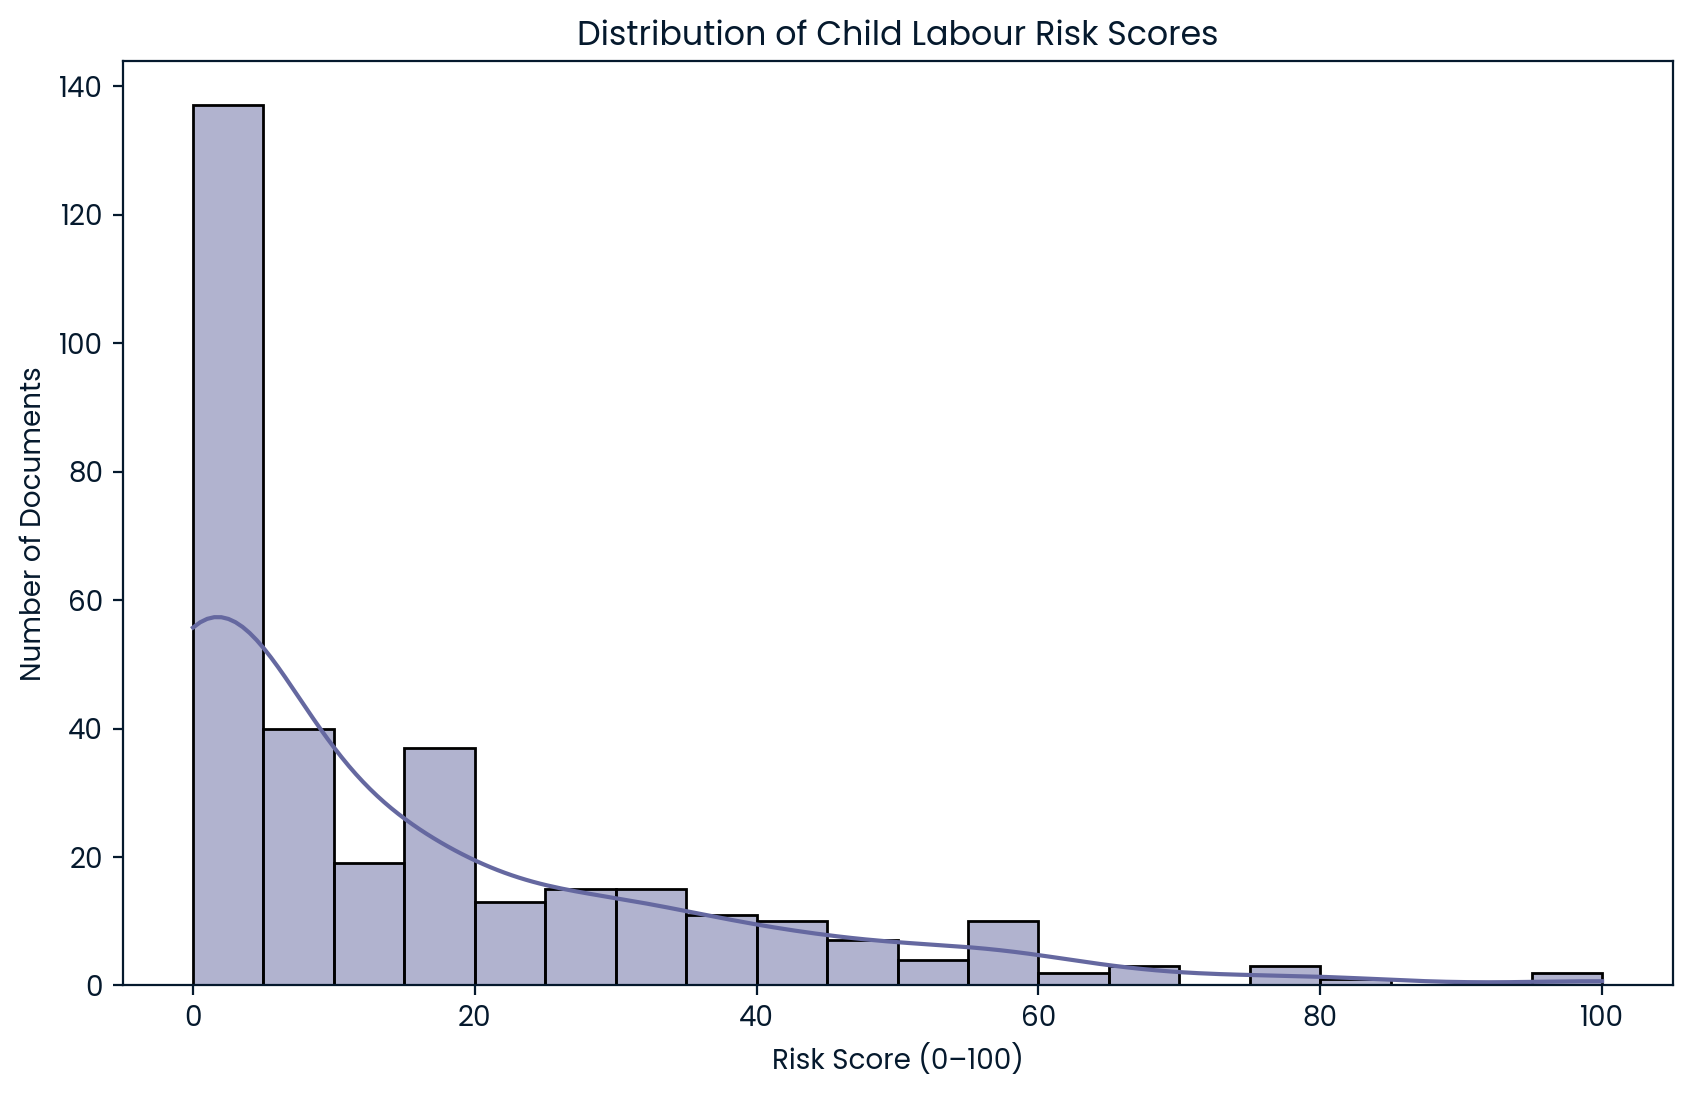

In [2]:
df = pd.read_csv("gov_docs_with_scores.csv")

plt.figure(figsize=(10,6))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Child Labour Risk Scores')
plt.xlabel('Risk Score (0–100)')
plt.ylabel('Number of Documents')
plt.show()

In [3]:
df.head(10)

,doc_id,company_id,company_name,url,company_size,sectors,sub_industries,extracted_text_clean,doc_length,detected_goods,snippets,detected_good_count,unique_detected_goods,unique_detected_goods_count,score
0,0,RMZRFEKAVSF42,Urban Logistics ReitÃÂ PLC,https://www.urbanlogisticsreit.com/supply-chai...,NaN,Energy;Real Estate,Coal & Consumable Fuels;Industrial REITs,supply chain code of conduct | urban logistics...,707,[],[],0.0,NaN,0.0,0
1,1,YYKCG6HLXOBWM,Abbott Laboratories,https://dam.abbott.com/en-us/documents/pdfs/tr...,LARGE,Health Care,Pharmaceuticals;Health Care Equipment,position statement on human rights abbott beli...,148,[],[],0.0,NaN,0.0,0
2,2,RPO43IPXA62O6,Fortive Corp,https://www.fortive.com/sites/default/files/fi...,LARGE,Information Technology;Industrials,Electronic Equipment & Instruments;Industrial ...,3 2019 accelerating progress toward a sustaina...,7148,"['Coffee', 'Tungsten', 'Gold', 'Electric Cars'...","[('Coffee', 'local charity events to hosting c...",10.0,['Coffee' 'Electric Vehicles' 'Solar Panels' '...,9.0,47
3,3,4F44JZW6IC7JG,Akamai Technologies Inc,https://www.akamai.com/company/corporate-respo...,LARGE,Information Technology,Application Software;Internet Services & Infra...,gri sustainability reporting standards skip to...,543,['Laptops'],"[('Laptops', 'newsroom servers epyc business s...",4.0,['Laptops'],1.0,5
4,4,F5JRKO67WN6RM,Keller Group PLC,https://www.keller.com/sites/keller-africa-za/...,SMALL,Industrials,Construction & Engineering,building foundations for a sustainable future ...,1636,[],[],0.0,NaN,0.0,0
5,5,L3LFWS7SMD6OM,Renewi PLC,https://www.renewi.com/-/media/pdf/reports-and...,SMALL,Industrials,Environmental & Facilities Services,renewi plc modern slavery statement 2023 intro...,1449,[],[],0.0,NaN,0.0,0
6,6,P3UJCTPH5DFOW,RENTOKIL INITIAL,https://www.rentokil-initial.com/~/media/Files...,LARGE,Industrials,Diversified Support Services;Environmental & F...,1 code of conduct code of conduct you are the ...,6386,"['Phones', 'Laptops', 'Garments']","[('Phones', 'use hand-held mobile phones/devic...",6.0,['Phones' 'Garments' 'Laptops'],3.0,15
7,7,WMAV6CIX6HJ3I,Amazon.com CDR,https://sustainability.aboutamazon.com/modern-...,LARGE,Consumer Discretionary,Broadline Retail;Internet Services & Infrastru...,modern slavery statement amazon (newline) (ne...,6492,"['Tungsten', 'Gold', 'Tin', 'Cotton', 'Garment...","[('Garments', 'amazon-branded products are app...",13.0,['Garments' 'Electronics' 'Tin' 'Tungsten' 'Go...,7.0,36
8,8,Y4VP27VVPJGVG,ONEOK,https://www.oneok.com/about-us/ethics-compliance,LARGE,Energy,Oil & Gas Storage & Transportation,ethics and compliance skip to main content abo...,790,['Petrol'],"[('Petrol', 'denatured fuel ethanol diesel fue...",1.0,['Petrol'],1.0,5
9,9,Y6U55BEVXRWN6,DANAHER,https://danaher.com/sites/default/files/2024-0...,LARGE,Health Care,Biotechnology;Health Care Equipment,supplier code of conduct revised may 2024 1. i...,1586,"['Tungsten', 'Gold', 'Tin']","[('Tin', 'countries of origin for the tin, tan...",3.0,['Tin' 'Tungsten' 'Gold'],3.0,15


How many goods scored 0?

In [4]:
# Calculate the number of documents with a score of 0
zero_score_docs = df[df['score'] == 0]
num_zero_score_docs = zero_score_docs.shape[0]
num_zero_score_docs

137

## Sector-wise risk score

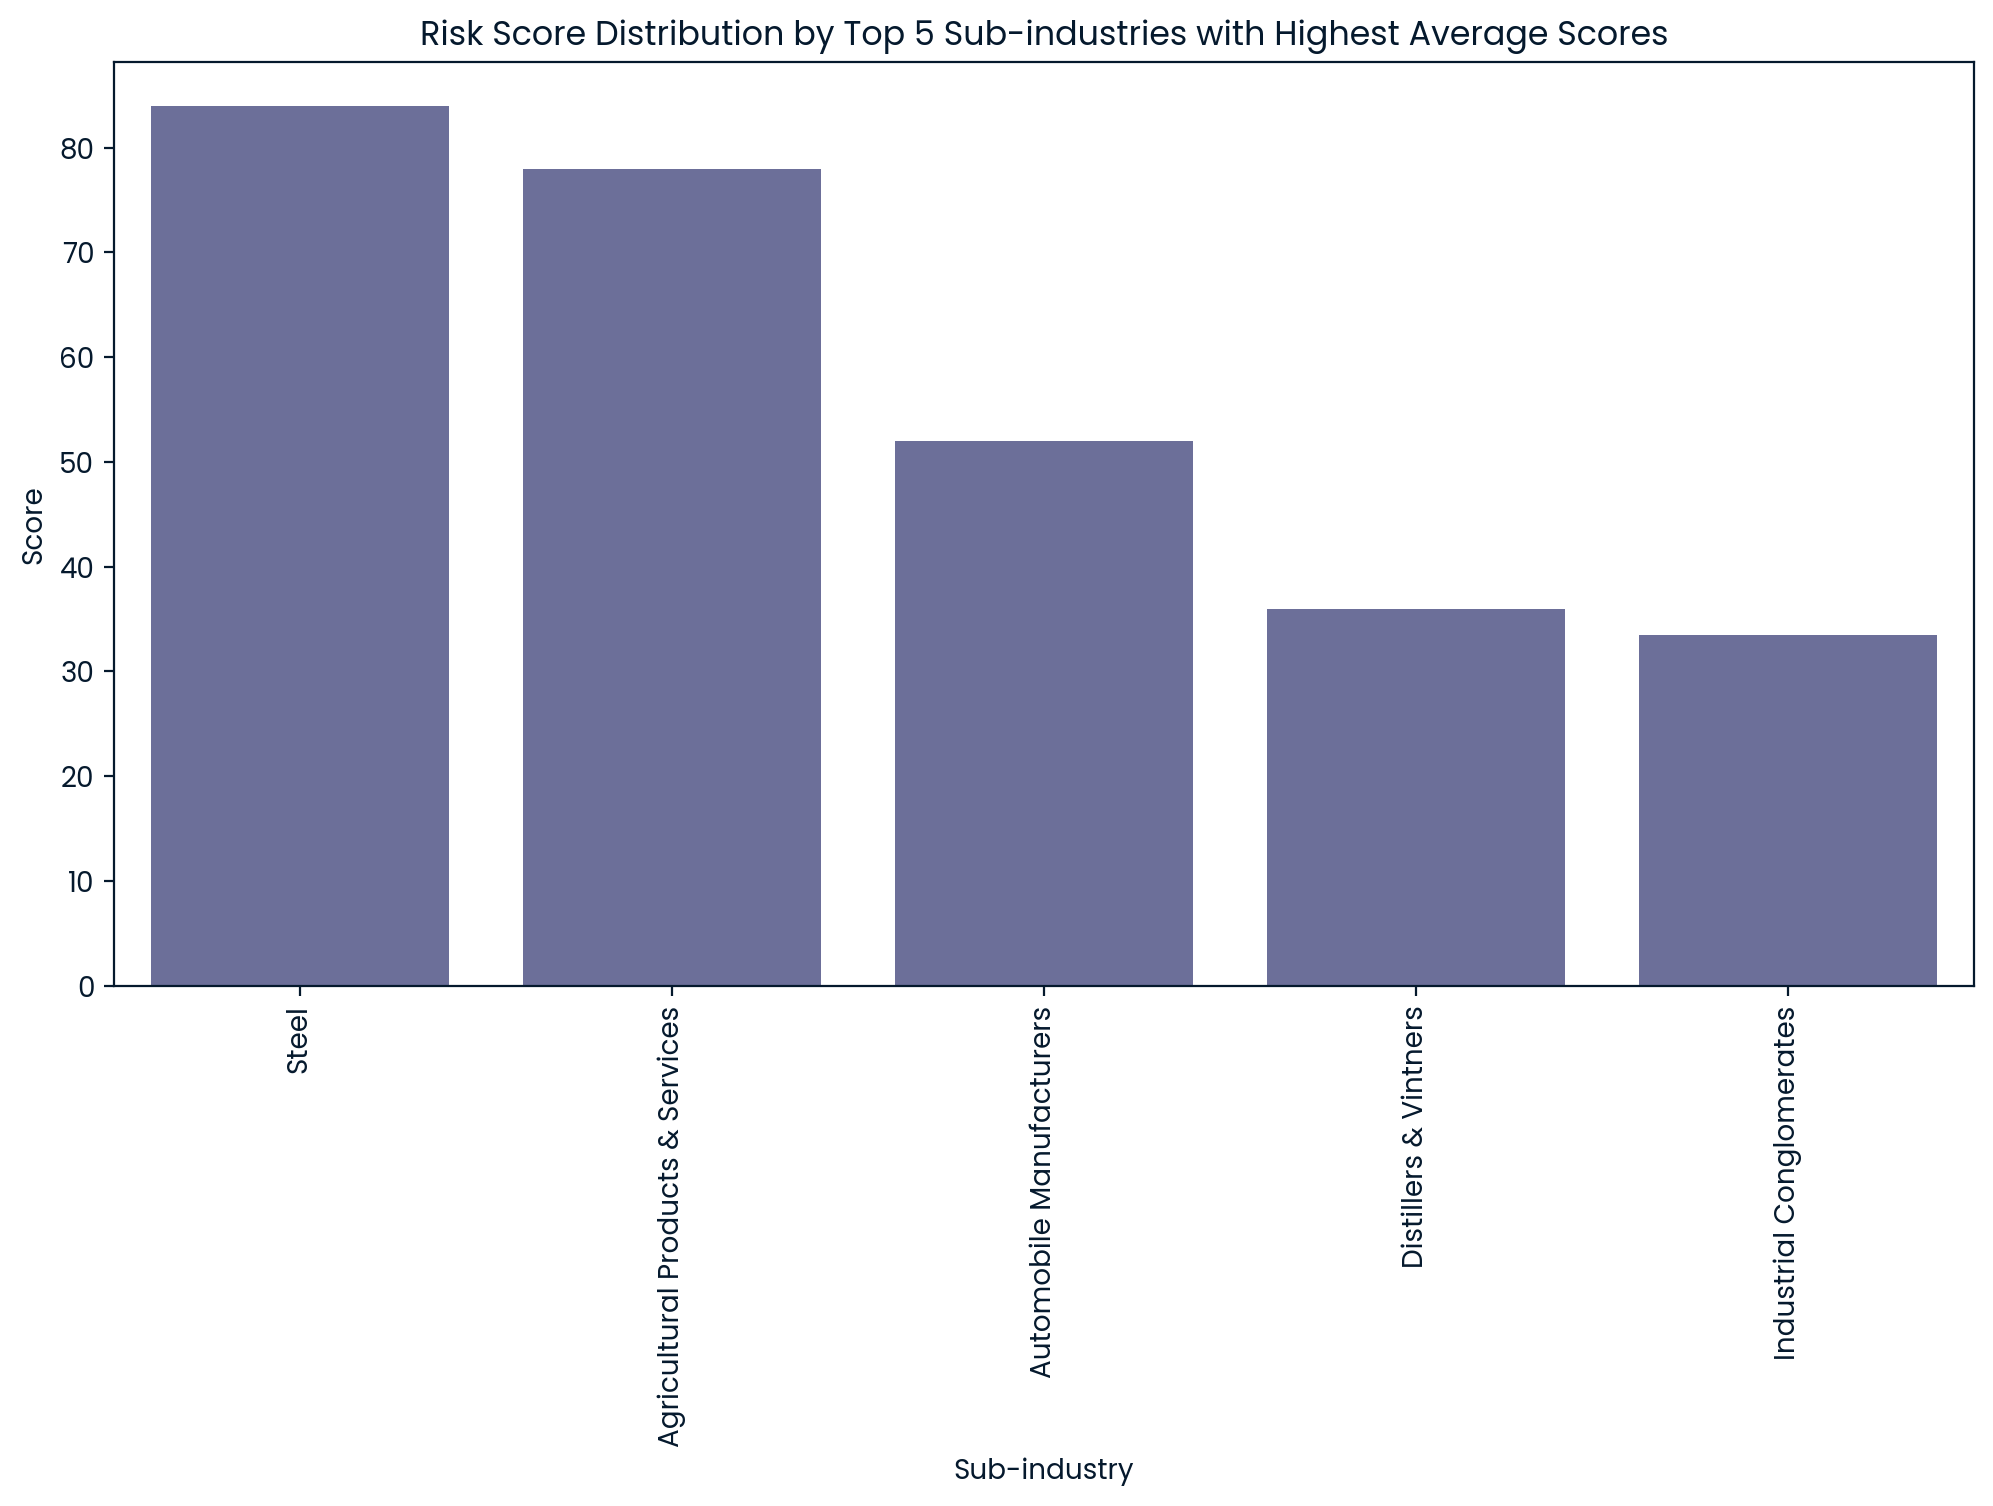

In [12]:
# Split the 'sub_industries' column by semi-colon and explode the dataframe
df_exploded = df.assign(sub_industries=df['sub_industries'].str.split(';')).explode('sub_industries')

# Calculate the average score by sector
avg_score_by_sector = df_exploded.groupby('sub_industries')['score'].mean().sort_values(ascending=False).head(5).index

# Filter the dataframe to include only the top 5 sectors
top_sectors_df = df_exploded[df_exploded['sub_industries'].isin(avg_score_by_sector)]

plt.figure(figsize=(12,6))
sns.barplot(x='sub_industries', y='score', data=top_sectors_df, ci=None, order=top_sectors_df.groupby('sub_industries')['score'].mean().sort_values(ascending=False).index)
plt.title('Risk Score Distribution by Top 5 Sub-industries with Highest Average Scores')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Sub-industry')
plt.show()

Top 5 by average sector score

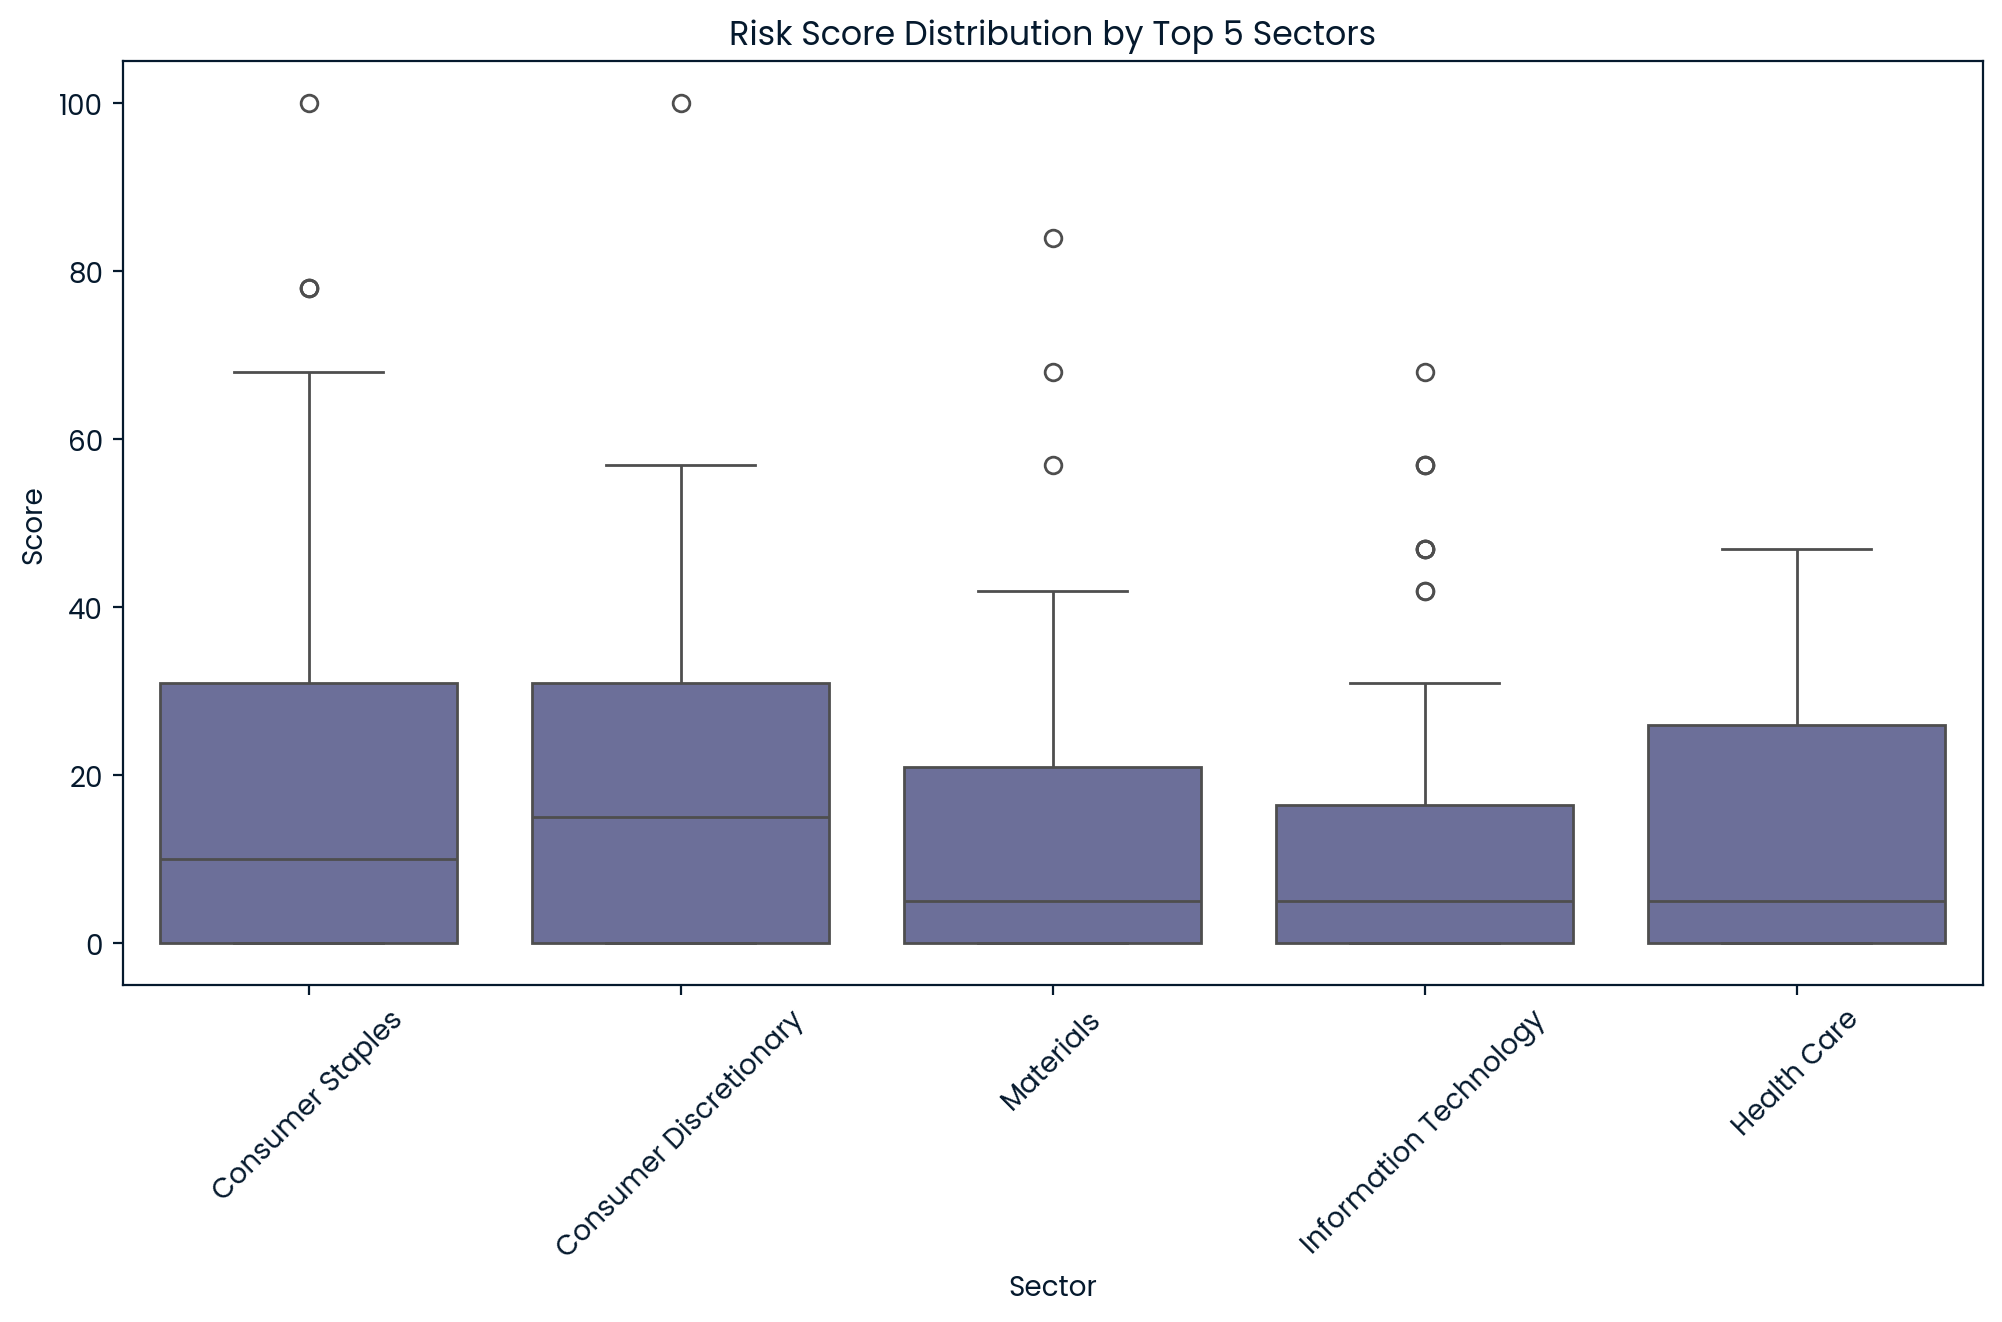

In [13]:
# Split the 'sectors' column by semi-colon and explode the dataframe
df_exploded_sectors = df.assign(sectors=df['sectors'].str.split(';')).explode('sectors')

# Calculate the average score by sector
avg_score_by_sector = df_exploded_sectors.groupby('sectors')['score'].mean().sort_values(ascending=False).head(5).index

# Filter the dataframe to include only the top 5 sectors
top_sectors_df = df_exploded_sectors[df_exploded_sectors['sectors'].isin(avg_score_by_sector)]

plt.figure(figsize=(12,6))
sns.boxplot(x='sectors', y='score', data=top_sectors_df, order=top_sectors_df.groupby('sectors')['score'].mean().sort_values(ascending=False).index)
plt.title('Risk Score Distribution by Top 5 Sectors')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Sector')
plt.show()

## Unique vs Total Mentions

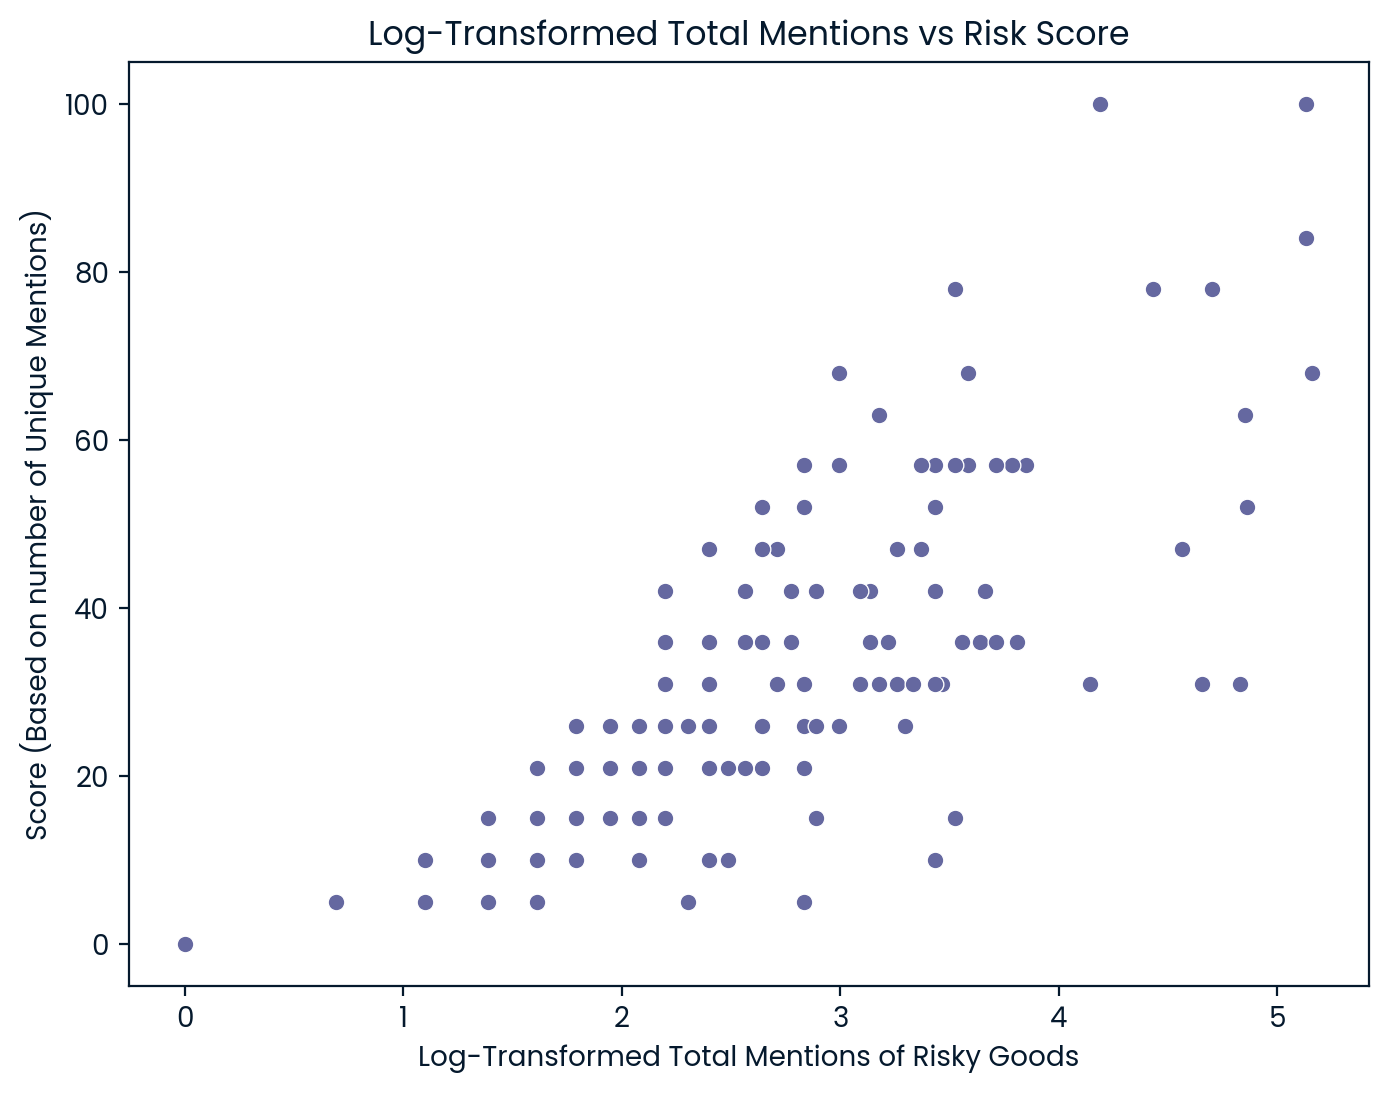

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.log1p(df['detected_good_count']), y='score', data=df)
plt.title('Log-Transformed Total Mentions vs Risk Score')
plt.xlabel('Log-Transformed Total Mentions of Risky Goods')
plt.ylabel('Score (Based on number of Unique Mentions)')
plt.show()

## Detecting Outlier companies

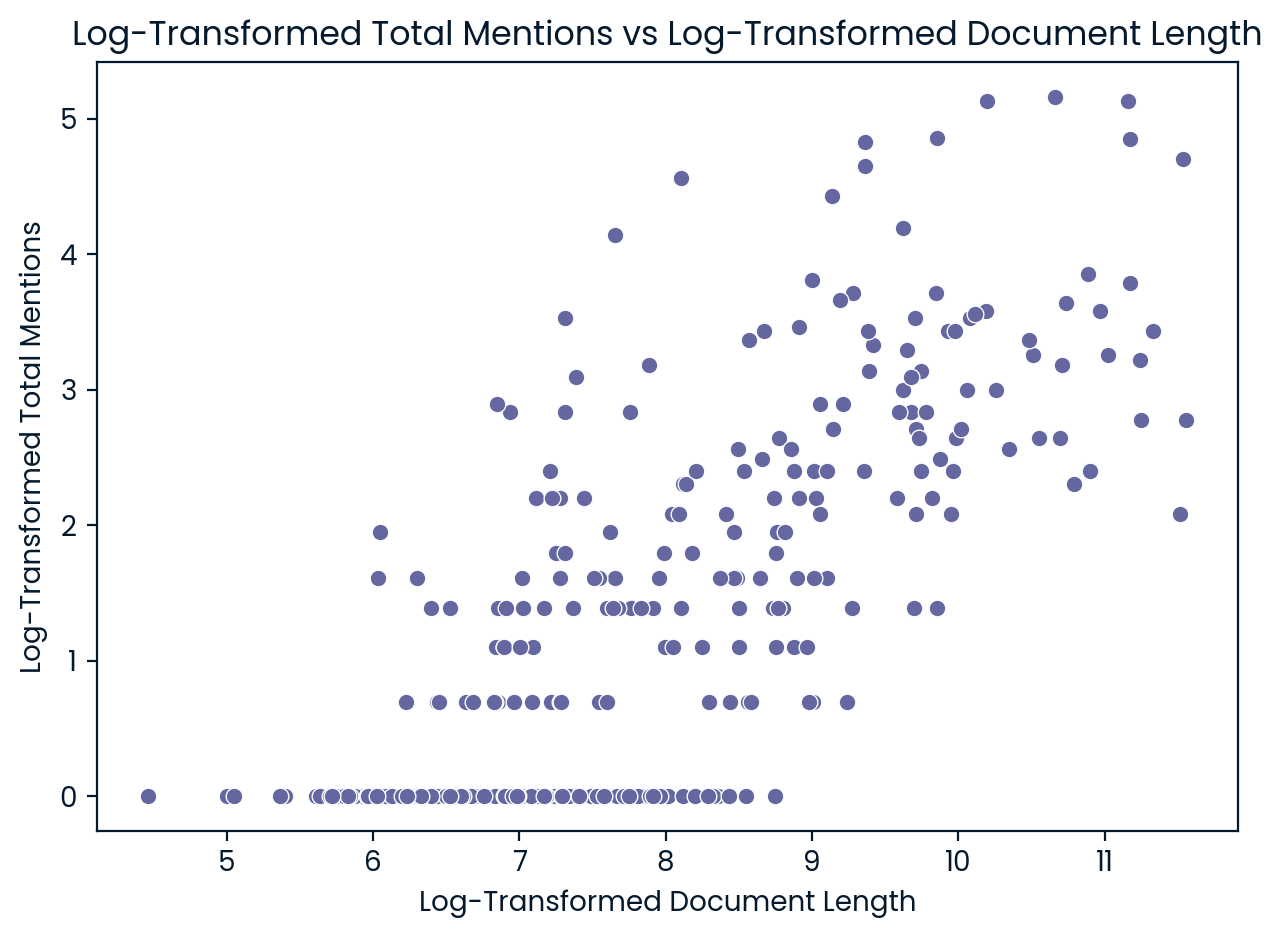

In [21]:
# Scatter plot of Log-Transformed Total Mentions vs Log-Transformed Document Length
sns.scatterplot(x=np.log1p(df['doc_length']), y=np.log1p(df['detected_good_count']), data=df)
plt.title('Log-Transformed Total Mentions vs Log-Transformed Document Length')
plt.xlabel('Log-Transformed Document Length')
plt.ylabel('Log-Transformed Total Mentions')

plt.tight_layout()
plt.show()

Aim here is to detect companies with high scores but maybe low doc-length, or maye sectoral anomalies. These are potential 'red-flag' companies

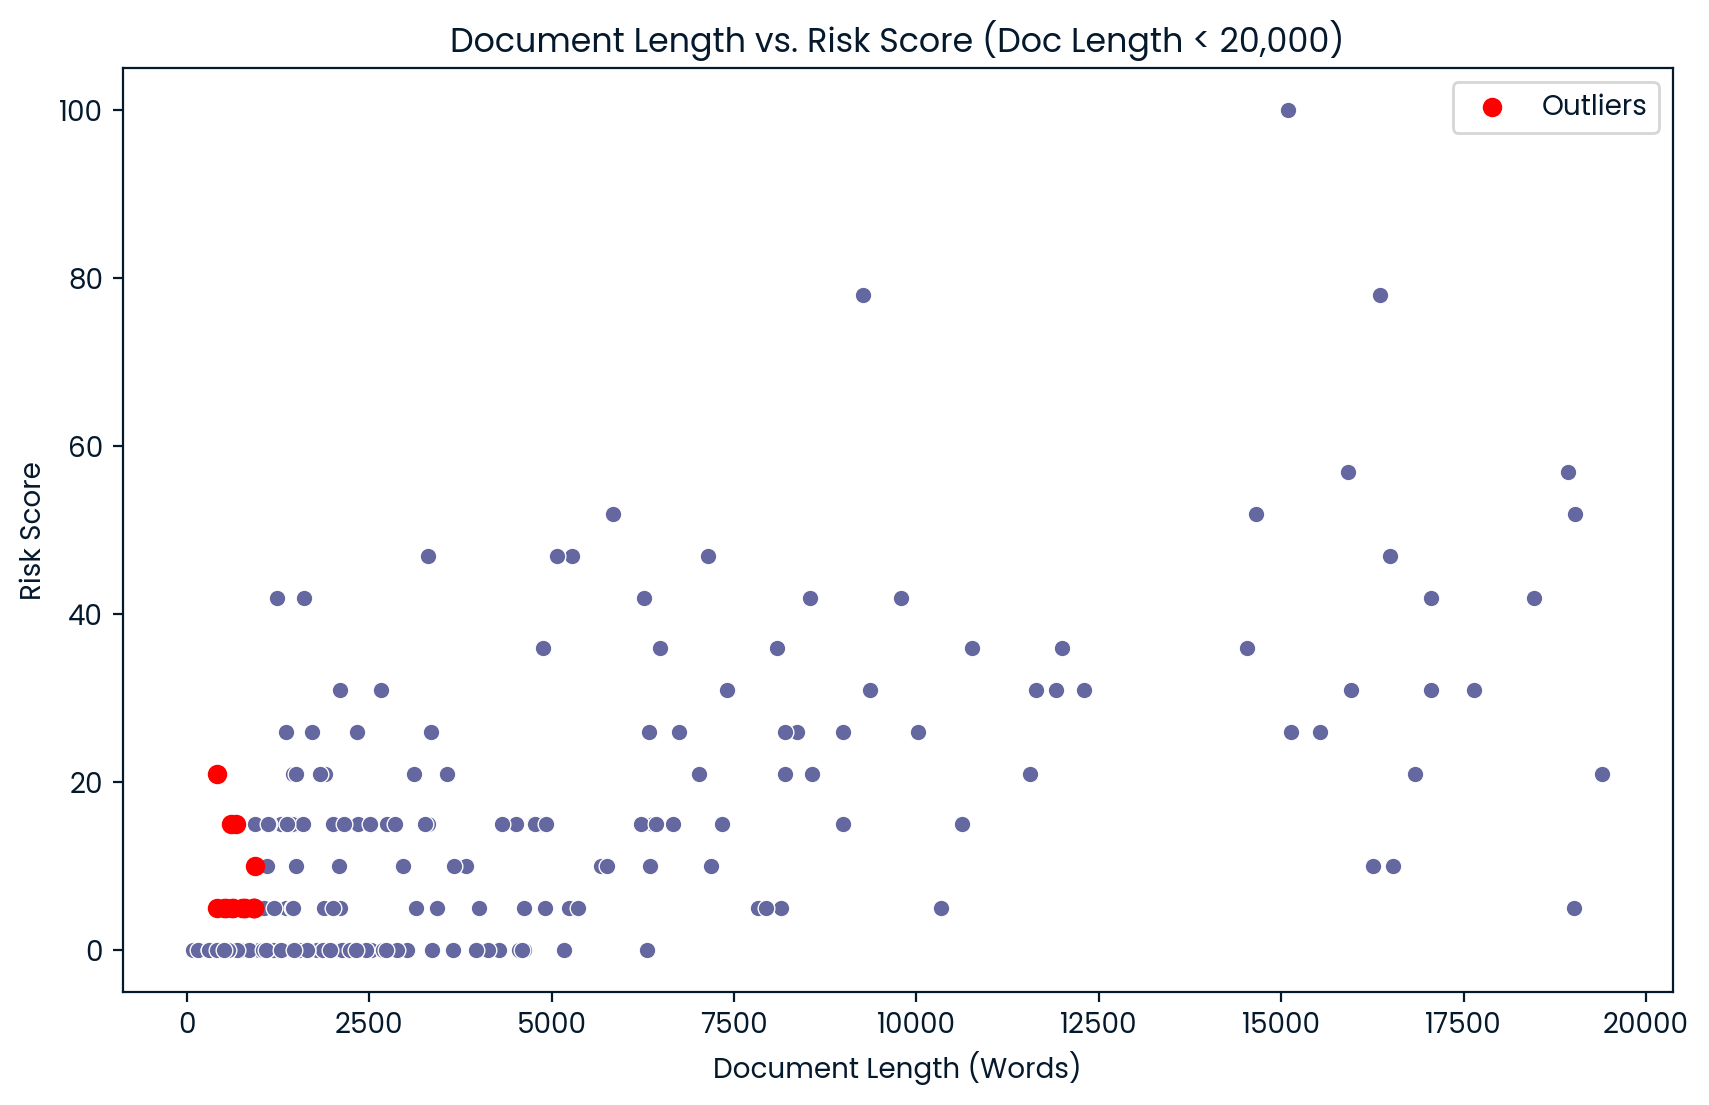

,company_name,score,sectors,sub_industries,doc_length
3,Akamai Technologies Inc,5,Information Technology,Application Software;Internet Services & Infra...,543
8,ONEOK,5,Energy,Oil & Gas Storage & Transportation,790
28,4Imprint Group Plc,5,Communication Services,Advertising;Publishing,925
34,NXP Semiconductors NV,5,Information Technology,Semiconductors,418
70,HP Inc,21,Information Technology;Consumer Discretionary,"Technology Hardware, Storage & Peripherals;Con...",421
92,Kenvue Inc.,10,Consumer Staples,Personal Care Products,932
118,KLA Corp.,5,Information Technology,Semiconductor Materials & Equipment,622
163,Stanley Black & Decker Inc,15,Industrials,Industrial Machinery & Supplies & Components,681
164,A.G.Barr PLC,5,Consumer Staples,Soft Drinks & Non-alcoholic Beverages,763
165,ASTRAZENECA,5,Health Care,Pharmaceuticals;Biotechnology,506


In [8]:
outliers = df[(df['score'] > 0) & (df['doc_length'] < df['doc_length'].quantile(0.25)) & (df['doc_length'] < 20000)]

plt.figure(figsize=(10,6))
sns.scatterplot(x='doc_length', y='score', data=df[df['doc_length'] < 20000])
plt.scatter(outliers['doc_length'], outliers['score'], color='red', label='Outliers')
plt.title('Document Length vs. Risk Score (Doc Length < 20,000)')
plt.xlabel('Document Length (Words)')
plt.ylabel('Risk Score')
plt.legend()
plt.show()

outliers[['company_name', 'score', 'sectors', 'sub_industries', 'doc_length']]

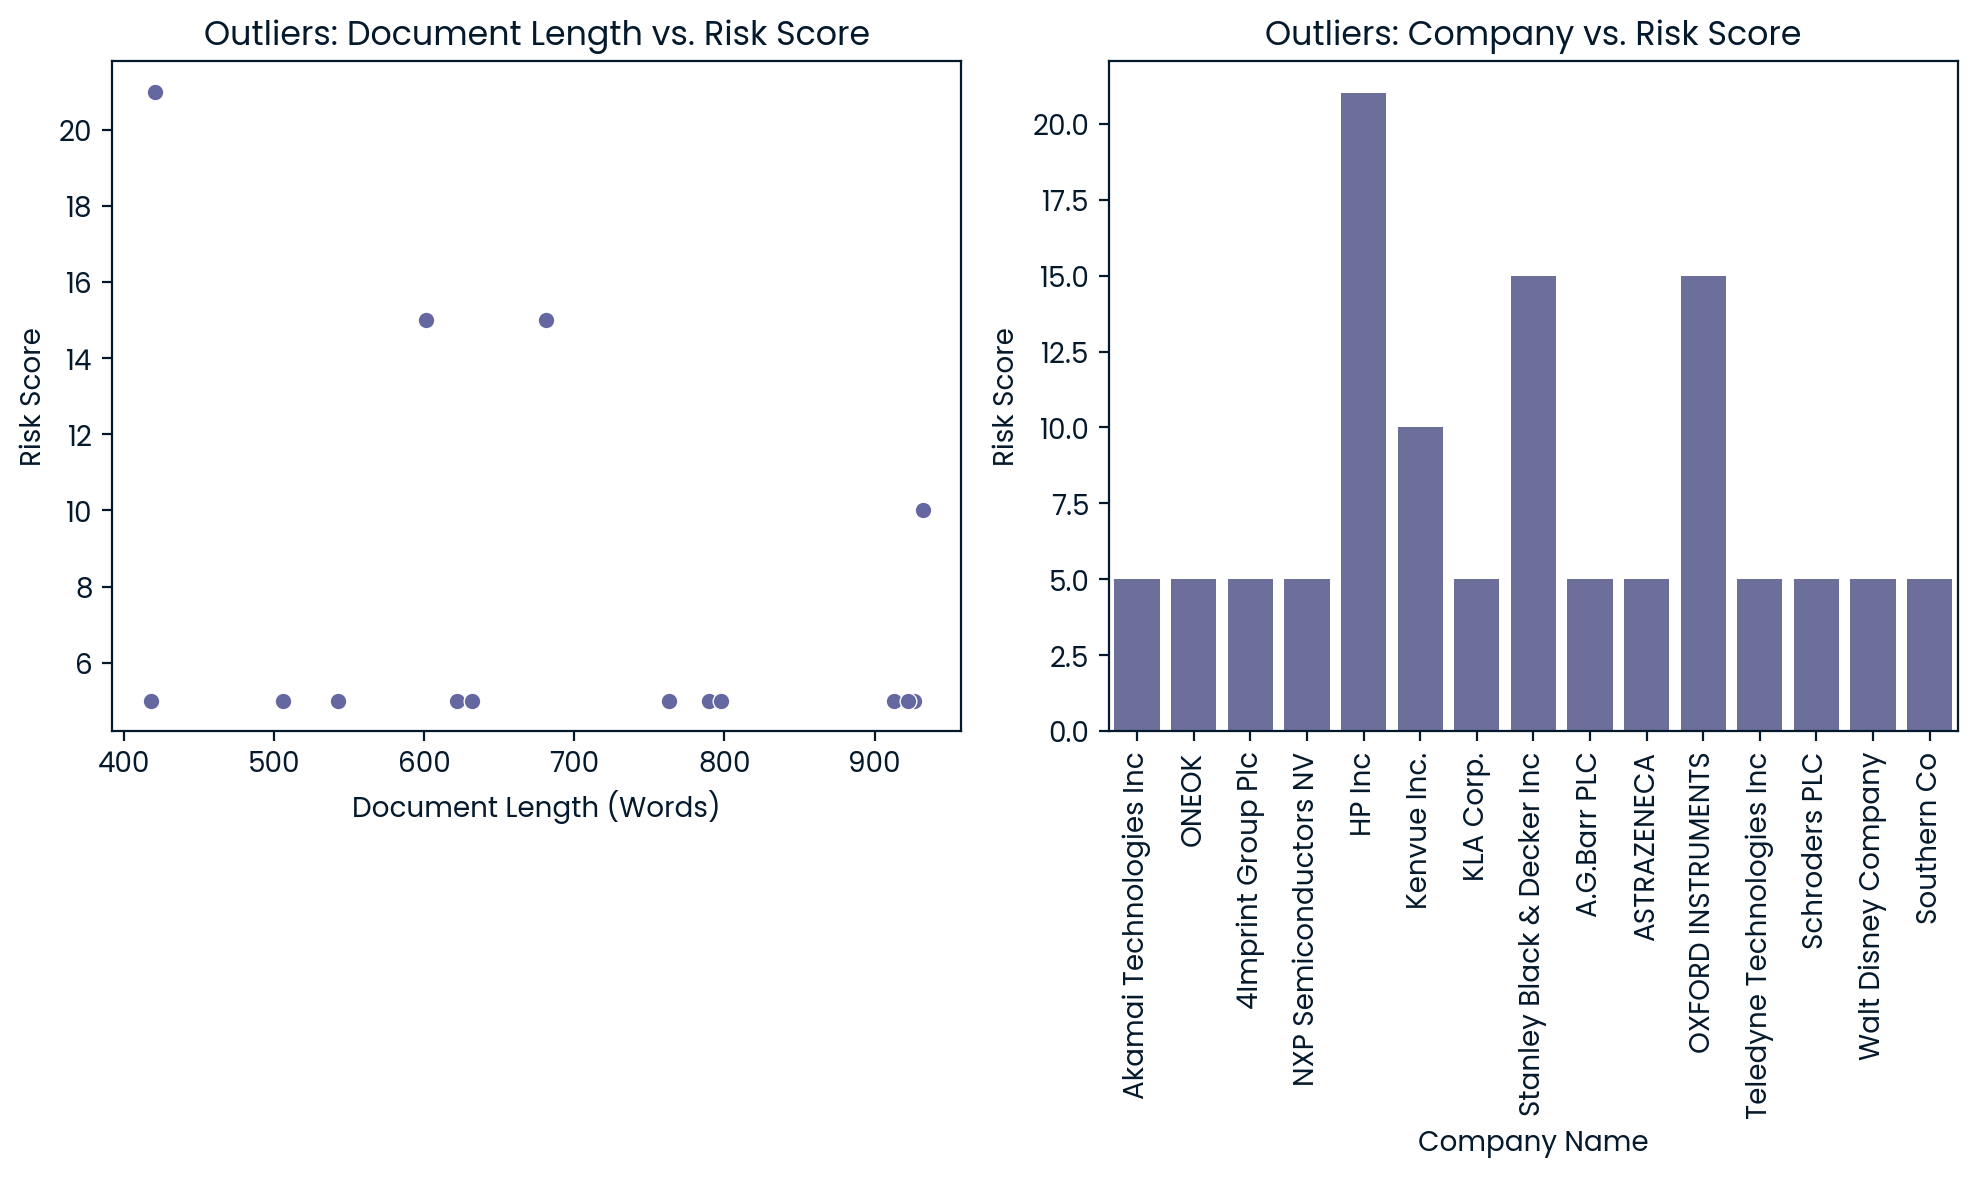

In [11]:
plt.figure(figsize=(10,6))

# Scatter plot for outliers
plt.subplot(1, 2, 1)
sns.scatterplot(x='doc_length', y='score', data=outliers)
plt.title('Outliers: Document Length vs. Risk Score')
plt.xlabel('Document Length (Words)')
plt.ylabel('Risk Score')

# Bar plot for outliers' scores
plt.subplot(1, 2, 2)
sns.barplot(x='company_name', y='score', data=outliers)
plt.title('Outliers: Company vs. Risk Score')
plt.xlabel('Company Name')
plt.ylabel('Risk Score')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Lastly, score/ divided by doc length

Longer docs have more text therefore potnetially more likely to have higher mentions of risky goods.

Will now create a visualisation of top 10 companies with score / doc length

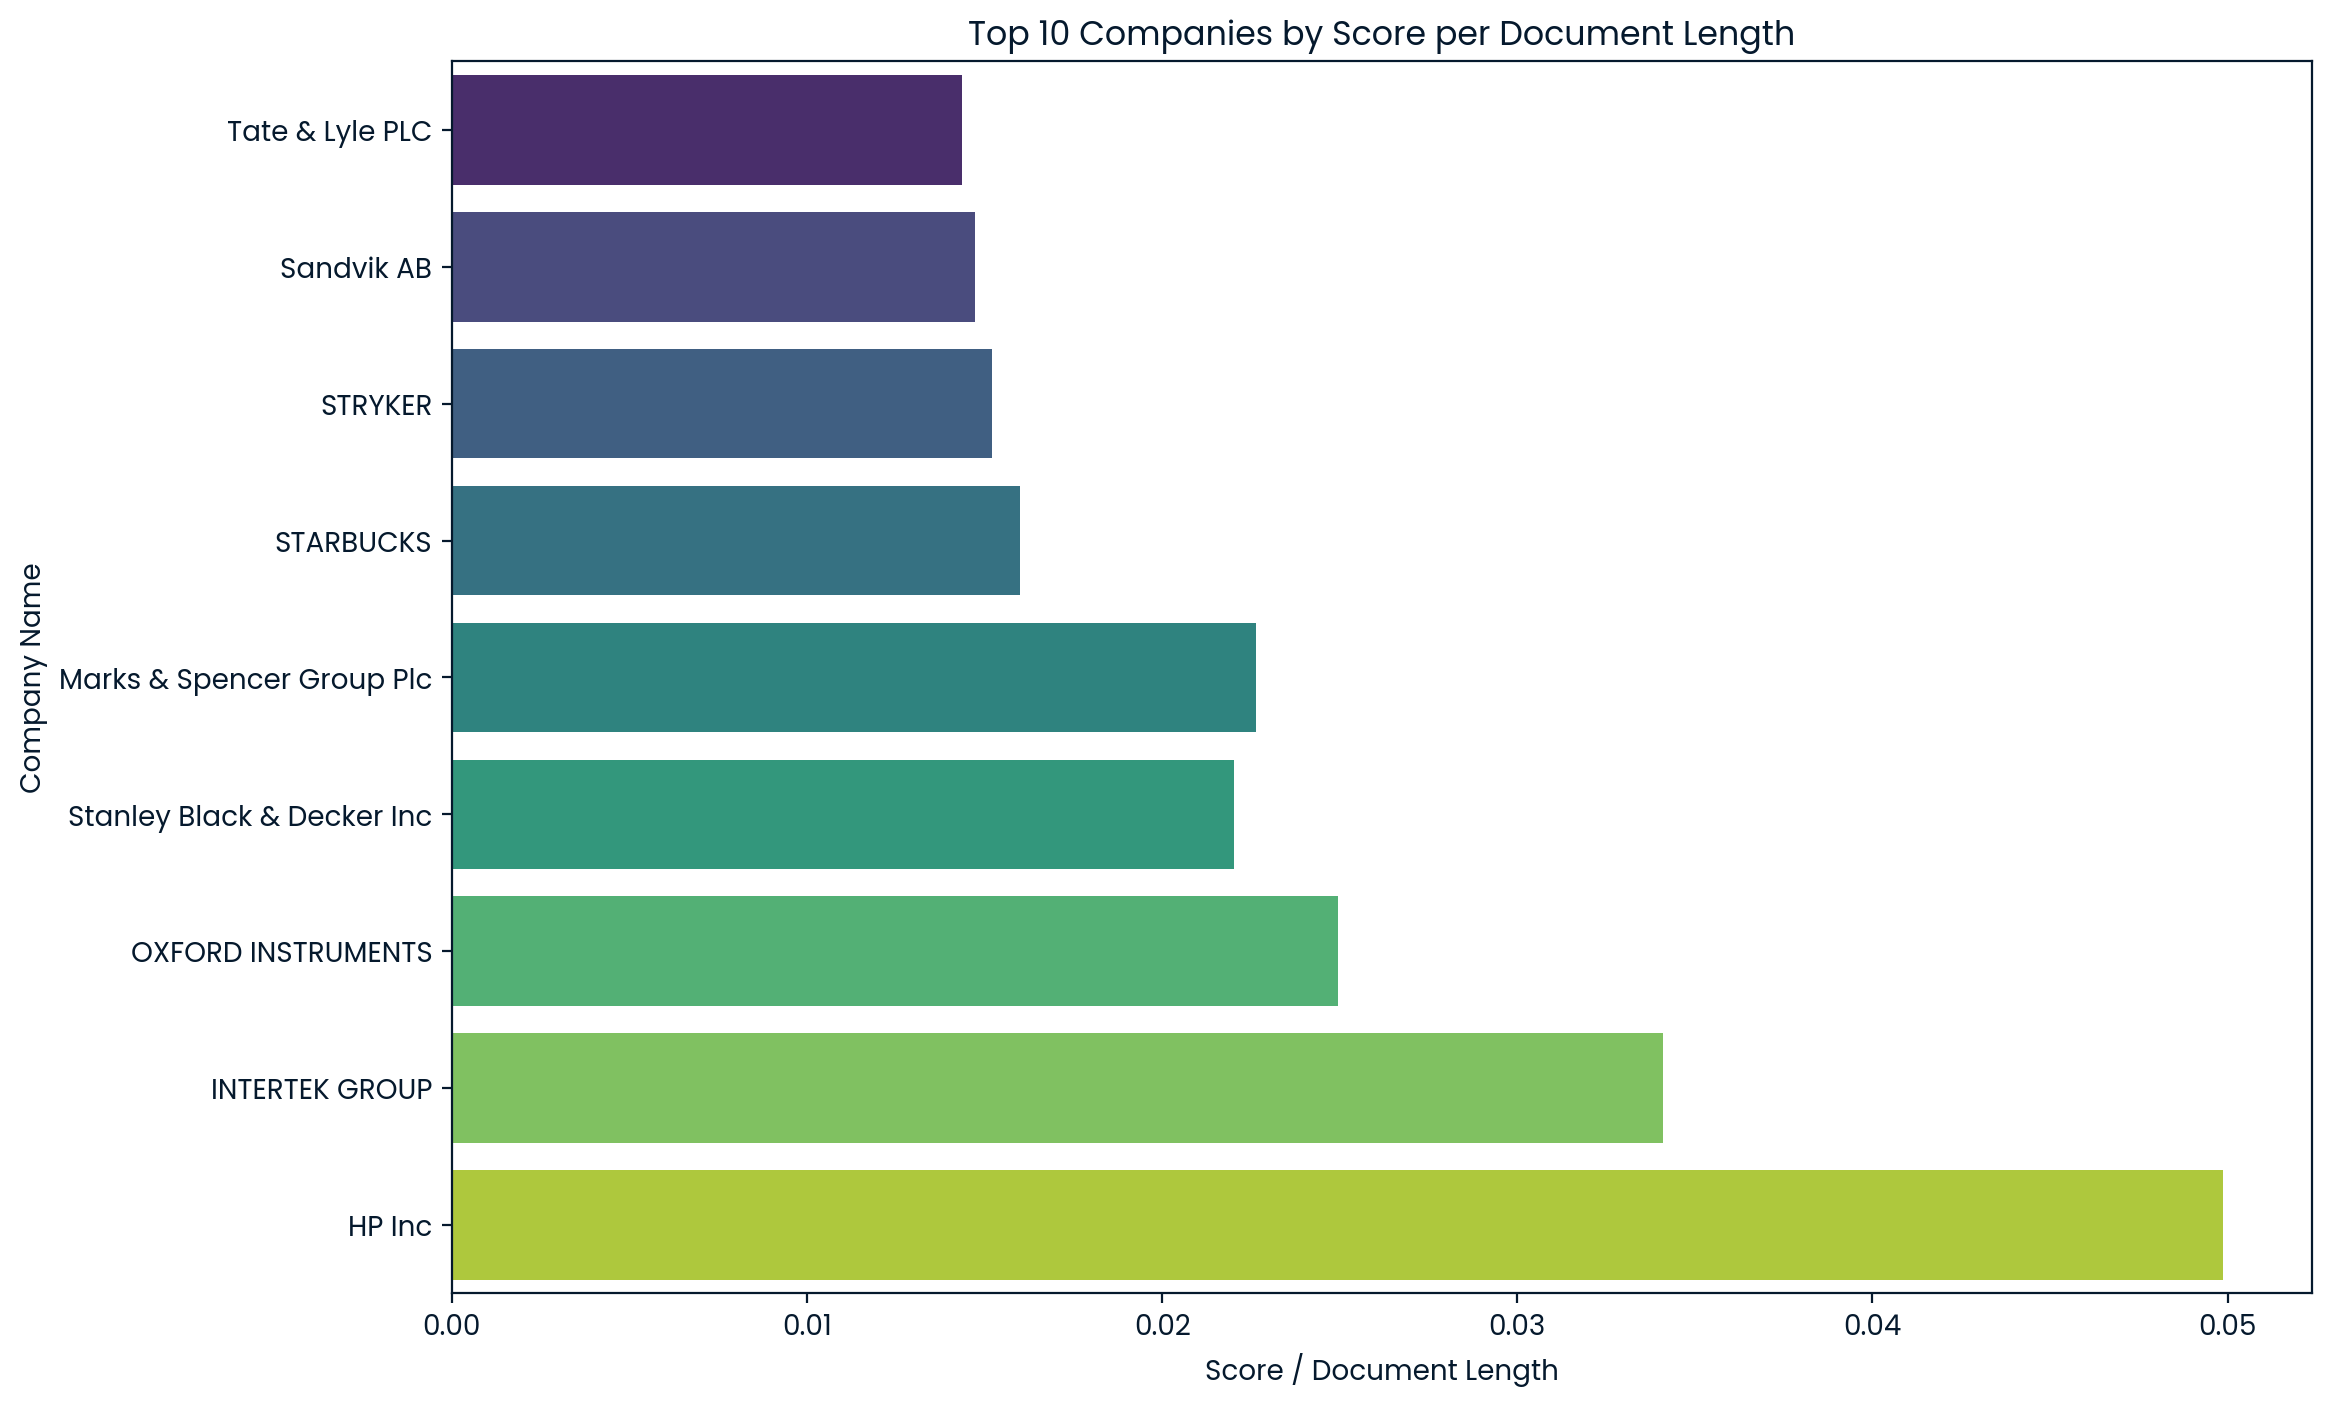

In [16]:
# Calculate score per document length
df['score_per_doc_length'] = df['score'] / df['doc_length']

# Get top 10 companies by score per document length
top_10_companies = df.nlargest(10, 'score_per_doc_length')

# Sort the top 10 companies by score per document length in ascending order
top_10_companies = top_10_companies.sort_values(by='score_per_doc_length', ascending=True)

# Remove confidence interval (ci) for Marks and Spencer
plt.figure(figsize=(12, 8))
sns.barplot(x='score_per_doc_length', y='company_name', data=top_10_companies, palette='viridis', ci=None)
plt.title('Top 10 Companies by Score per Document Length')
plt.xlabel('Score / Document Length')
plt.ylabel('Company Name')
plt.show()